In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance

In [2]:
# Load dataset
from google.colab import drive
drive.mount("/content/drive/")
data = pd.read_csv("/content/drive/MyDrive/Data_AI/Training.csv")

Mounted at /content/drive/


In [3]:
# Display basic data information
print("Data Shape:", data.shape)
print(data.head(10))
print("Column Names:", data.columns)
data.info()

Data Shape: (415, 15)
    DEM      Runoff       FCO       Faults     Slope       SPI        TWI  \
0  1869  492.098999  1.805270  1385.119995  0.424932  0.037082   8.998397   
1  1869  330.105988  1.803020  1458.209961  6.147607  2.692700   7.421291   
2  1882  738.716003  0.616477    79.555000  6.147607  2.692700   7.421291   
3  1875  481.506012  1.541800  1014.349976  2.955602  0.774449   7.751146   
4  1881  412.097992  1.384620   345.000000  0.070780  0.000000  10.097623   
5  1877  727.906982  1.718770   880.510986  2.695145  0.235365   7.150399   
6  1856   62.817200  0.647462  4331.279785  6.027460  6.335220   8.214367   
7  1858  319.231995  3.010720  2761.810059  0.637042  0.000000   7.900320   
8  1858  319.231995  3.010720  2761.810059  0.637042  0.000000   7.900320   
9  1858  319.231995  3.010720  2761.810059  0.637042  0.000000   7.900320   

   Rain       TRI         UD      Aspect  Curvature      NDVI  Manning  FLOOD  
0    73  0.555012  30.336220  266.623871   0.04052

In [4]:
# Check for missing values
print("Columns with missing values:", data.isnull().any())

Columns with missing values: DEM          False
Runoff       False
FCO          False
Faults       False
Slope        False
SPI          False
TWI          False
Rain         False
TRI          False
UD           False
Aspect       False
Curvature    False
NDVI         False
Manning      False
FLOOD        False
dtype: bool


In [5]:
# Identify categorical and numerical variables
categorical_features = data.select_dtypes(include='object').columns.tolist()
numerical_features = data.select_dtypes(exclude='object').columns.tolist()
print(f"There are {len(categorical_features)} categorical variables:", categorical_features)
print(f"There are {len(numerical_features)} numerical variables:", numerical_features)

There are 0 categorical variables: []
There are 15 numerical variables: ['DEM', 'Runoff', 'FCO', 'Faults', 'Slope', 'SPI', 'TWI', 'Rain', 'TRI', 'UD', 'Aspect', 'Curvature', 'NDVI', 'Manning', 'FLOOD']


In [6]:
# Display summary statistics for numerical variables
print(data[numerical_features].describe().round(2))

           DEM   Runoff     FCO   Faults   Slope     SPI     TWI    Rain  \
count   415.00   415.00  415.00   415.00  415.00  415.00  415.00  415.00   
mean   1876.48   769.07    4.44  1921.76    2.67   13.66    8.90   58.07   
std      34.88   833.83    3.81  1919.90    2.74   45.06    2.00    9.35   
min    1844.00     1.00    0.00     6.32    0.07    0.00    4.20   43.00   
25%    1854.00   185.30    1.31   404.74    0.94    0.08    7.41   49.00   
50%    1867.00   447.77    2.97  1264.93    2.03    0.82    8.37   57.00   
75%    1885.00  1112.10    6.81  3048.93    3.41    3.31   10.04   68.00   
max    2066.00  3360.77   13.63  9779.46   29.61  455.17   15.59   73.00   

          TRI      UD  Aspect  Curvature    NDVI  Manning   FLOOD  
count  415.00  415.00  415.00     415.00  415.00   415.00  415.00  
mean     0.50   34.70  170.01      -0.16    0.43     0.05    0.70  
std      0.08    9.93  103.82       0.83    0.07     0.01    0.46  
min      0.18    4.09    2.73      -3.40   

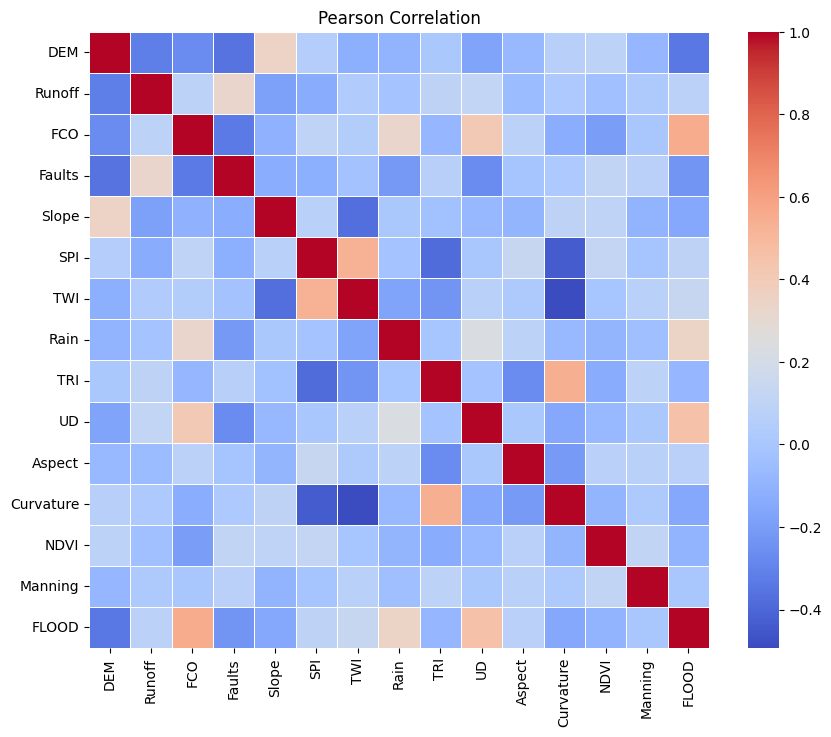

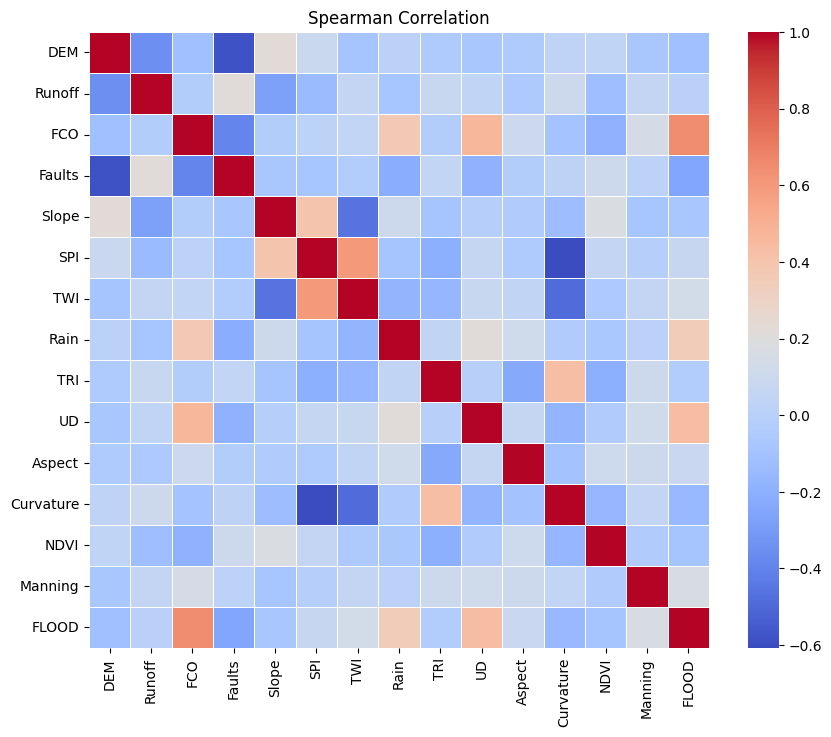

In [7]:
# Generate correlation heatmaps
correlation_methods = ['pearson', 'spearman']
for method in correlation_methods:
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(method=method), annot=False, cmap='coolwarm', linewidths=.5)
    plt.title(f'{method.capitalize()} Correlation')
    plt.show()

In [9]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_to_normalize = data.iloc[:, :-1]
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=data.columns[:-1])
normalized_df['Flood'] = data.iloc[:, -1]
data = normalized_df
print(data.head(5))

        DEM    Runoff       FCO    Faults         Slope       SPI       TWI  \
0  0.112613  0.146170  0.132487  0.141080  1.198983e-02  0.000081  0.421055   
1  0.112613  0.097955  0.132322  0.148559  2.057311e-01  0.005916  0.282525   
2  0.171171  0.219573  0.045243  0.007493  2.057311e-01  0.005916  0.282525   
3  0.139640  0.143018  0.113151  0.103142  9.766571e-02  0.001701  0.311499   
4  0.166667  0.122359  0.101616  0.034654  1.117216e-09  0.000000  0.517609   

       Rain       TRI        UD    Aspect  Curvature      NDVI   Manning  \
0  1.000000  0.718910  0.519608  0.749594   0.530856  0.161258  0.285714   
1  1.000000  0.549419  0.599225  0.261801   0.462813  0.174113  0.285714   
2  1.000000  0.549419  0.599225  0.261801   0.462813  0.174113  0.285714   
3  0.466667  0.365861  0.578816  0.395252   0.555497  0.114411  0.285714   
4  0.833333  0.613765  0.347728  0.631362   0.524602  0.476421  0.285714   

   Flood  
0      1  
1      1  
2      1  
3      1  
4      1  


In [10]:
# Split data into training and testing sets
x = data.drop(['Flood'], axis=1).values
y = data['Flood'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [11]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Cross-validation accuracy scores: [0.79310345 0.82758621 0.82758621 0.86206897 0.79310345 0.89655172
 0.75862069 0.82758621 0.86206897 0.82758621]
Mean accuracy: 0.8276
Standard deviation: 0.0378


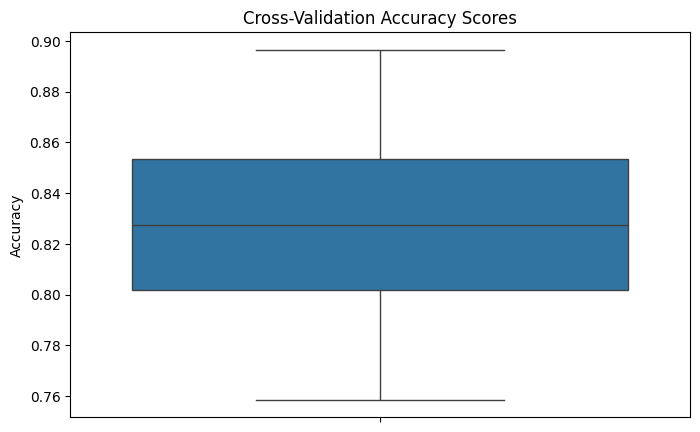

In [12]:
# Train and evaluate K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
cv_scores = cross_val_score(knn_classifier, x_train, y_train, cv=cv, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean():.4f}')
print(f'Standard deviation: {cv_scores.std():.4f}')

knn_classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 5))
sns.boxplot(cv_scores)
plt.title("Cross-Validation Accuracy Scores")
plt.ylabel("Accuracy")
plt.show()

y_pred = knn_classifier.predict(x_test)

Permutation Importance:
       Feature  Importance Mean  Importance Std
9          UD           0.0600        0.020317
2         FCO           0.0464        0.027434
13    Manning           0.0456        0.010151
7        Rain           0.0440        0.013506
6         TWI           0.0432        0.016080
1      Runoff           0.0384        0.012290
0         DEM           0.0320        0.014311
10     Aspect           0.0232        0.018745
11  Curvature           0.0208        0.010245
8         TRI           0.0192        0.008908
3      Faults           0.0168        0.014945
4       Slope           0.0112        0.010245
12       NDVI           0.0064        0.009330
5         SPI           0.0016        0.004800


<ipython-input-13-840a0a9de011>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance Mean', y='Feature', data=importance_df, palette="viridis")


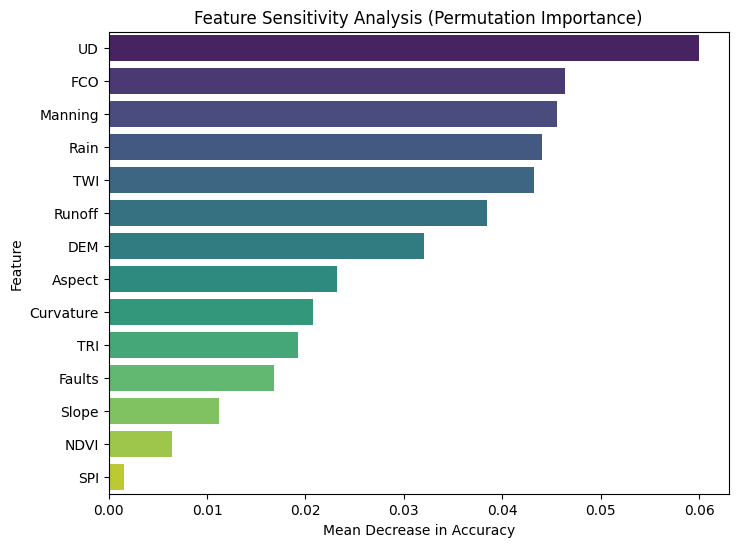

In [13]:
# Apply Permutation Importance on KNN
result = permutation_importance(knn_classifier, x_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importance_df = pd.DataFrame({
    'Feature': data.columns[:-1],
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print("Permutation Importance:\n", importance_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance Mean', y='Feature', data=importance_df, palette="viridis")
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.title('Feature Sensitivity Analysis (Permutation Importance)')
plt.show()

In [14]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.856
Confusion Matrix:
 [[27  8]
 [10 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75        35
           1       0.91      0.89      0.90        90

    accuracy                           0.86       125
   macro avg       0.82      0.83      0.82       125
weighted avg       0.86      0.86      0.86       125



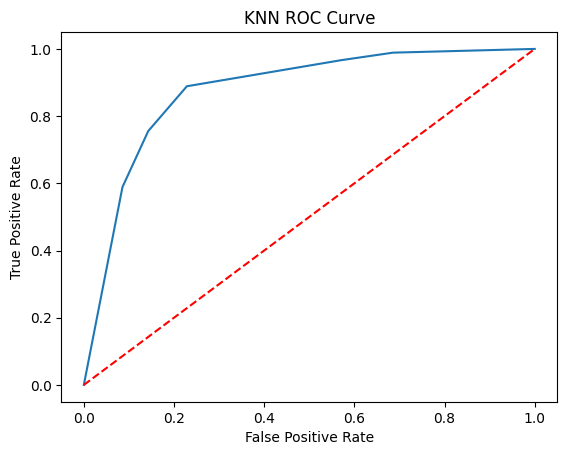

AUC: 0.8765079365079366


In [15]:
# ROC Curve and AUC
y_pred_prob = knn_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='KNN')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()
print('AUC:', roc_auc_score(y_test, y_pred_prob))

In [16]:
# Load new data and make predictions
new_data = pd.read_csv("/content/drive/MyDrive/Data_AI/DataPred.csv")
new_data = new_data.drop(['X', 'Y'], axis=1)
new_data_normalized = scaler.transform(new_data)
predictions = knn_classifier.predict(new_data_normalized)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Save predictions and probabilities
predictions_df = pd.DataFrame(predictions, columns=['Flood_Predictions'])
predictions_df.to_csv('/content/drive/MyDrive/Data_AI/Flood1_Predictions2.csv', index=False)

probabilities = knn_classifier.predict_proba(new_data_normalized)[:, 1]
probabilities_df = pd.DataFrame(probabilities, columns=['Probabilities'])
probabilities_df.to_csv('/content/drive/MyDrive/Data_AI/Probabilities.csv', index=False)